<a href="https://colab.research.google.com/github/FarnooshKh/JoyOfLearning/blob/master/ML_Python_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning Python Introduction

In this colab you learn to work with python and machine learning models



*   KNN (K Nearest Neighbor) 
*   PCA (Principal Component Analysis)



---











Import **numpy** which is the fundamental package for scientific computing with Python.


*  mainly useful for its N-dimensional array objects




Import **pandas** which is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [0]:
import numpy as np
import pandas as pd

To make sure that every single line will be  printed, even if they're in the same cell, we can use the following config:

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## breast_cancer DataSet

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

The breast cancer dataset is a classic and very easy binary classification dataset.

 **data : Bunch**

Dictionary-like object, 
*  the interesting attributes are: ‘data’
*  the data to learn, ‘target’, 
*  the classification labels, ‘target_names’
*  the meaning of the labels, ‘feature_names’
*  the meaning of the features, and ‘DESCR’, the full description of the dataset
*  ‘filename’, the physical location of breast cancer csv dataset (added in version 0.20).


#### load data from sklearn data sets

scikit-learn - the machine learning algorithms used for data analysis and data mining tasks


In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [13]:
df = pd.read_csv(data.filename)
data.data.shape
list(data.target_names)
data.target.sum()


(569, 30)

['malignant', 'benign']

357

## Splitting data to training and testing sets

To investigate performance of our model, we need to split the data to training and testing sets. This will help us to check potential overfitting in our model training.

**random_state** as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.4, random_state=5)



# Building classification models

Among the available classification methods in Python, we focus on the following five to build classification models of tissue type of the cancer cell lines in our dataset:

* Logistic regression
* **K- nearest neighbour **
* Naive Bayes
* Random forest
* Support vector machine

# K nearest neighbour(k-NN)

K nearest neighbour uses a distance metric like Euclidean distance to identity similarity of target data point (sample) in test or validation set to the data points (samples) in the trainign set. Then based on the user specified k, it finds the k closest points (samples) to the target data point. Afterward, it chooses the most frequent label among the k closes points (majority voting) as the class label of the target sample. The class labels can be also assigned based on weighted voting of the k closest data points to the data point.

**Note.** The k nearest neighbour is non-parametric.


In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fitting the model with the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [8]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1]


# Performance measures

To assess performance of the machine learning model, we can use one or few of the following measures of the performance of the model:

* **Accuracy**: This measure gives you a sense of performance for all the classes together as follows:

\begin{equation*} Accuracy=\frac{Number\:of\:correct\:predictions}{(Total\:number\:of\:data\:points (samples))} \end{equation*}

In case of binary classification, considering two groups of positive and negative samples, accuracy can be re-written as follows:

\begin{equation*} Accuracy=\frac{TP+TN}{(TP+TN+FP+FN)} \end{equation*}

Note. In case of imbalance in your classes, even a terrible classifier may result in high accuracy. As an example, assume you have 100 samples, 80 positive and 20 negative. Accuracy of a model that predict every sample is positive could be 0.8:

\begin{equation*} Accuracy=\frac{80+0}{(80+0+20+0)} = 0.8 \end{equation*}

which can be a model with zero weight for all the features and a positive intercept (constant in the model).

* **Confusion matrix (or error matrix)**: True and false classification of the samples in all the classes can be shown in a matrix which is called confusion (or error) matrix. The columsn are usually considered as the actual classes and rows as predicted classes. Hence, the diagonal elements of the matrix will be the total number of true classifcation in each class. 

In this confusion matrix By definition a confusion matrix  is such that C_ij  is equal to the number of observations known to be in i group  but predicted to be in group j.


|N |P
--- | ---
**N **| TN | FP
**P**|FN |  TP

In [9]:
from sklearn import metrics

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))

accuracy of the predictions: 0.9736842105263158
Confusion matrix of the predictions:
 [[ 74   3]
 [  3 148]]


Testing the model on the testing set:

# Dimentional Reduction

## Why is Dimensionality Reduction required?


1.   Space required to store the data is reduced as the number of dimensions comes down
2.   Less dimensions lead to less computation/training time
3.   Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful
4.  It takes care of multicollinearity by removing redundant features.
5.  It helps in visualizing data. It is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

**Dimensionality reduction can be done in two different ways:**


1.   By only keeping the most relevant variables from the original dataset (this technique is called feature selection)
2.  By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables (this technique is called dimensionality reduction)

**Common Dimensionality Reduction Techniques**

*   Principal Component Analysis (PCA)
*   Independent Component Analysis
*   t- Distributed Stochastic Neighbor Embedding (t-SNE)
*   UMAP


## Principle component analysis (PCA)

matplotlib - 2D plotting library producing publication quality figures

Text(0.5, 0, '1st dimension')

Text(0, 0.5, '2nd dimension')

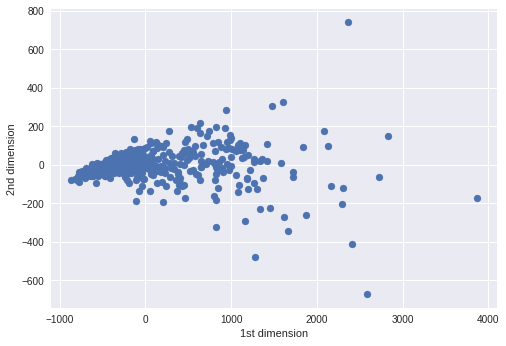

In [0]:
from sklearn import decomposition
import matplotlib.pyplot as plt

newData = decomposition.PCA(n_components=2).fit_transform(data.data)

plt.scatter(newData[:,0], newData[:,1])
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')

In [0]:
def embedding_plot(X,labels,title):
  uniqueNames, indices = np.unique(labels, return_inverse=True)
  
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', s=15)
  plt.gca().set_facecolor((1, 1, 1))
  plt.xlabel('1st dimension')
  plt.ylabel('2nd dimension')
  plt.grid(False)
  plt.colorbar(boundaries=np.arange((len(uniqueNames)+1))-0.5, ticks=np.arange(len(uniqueNames))
              ).set_ticklabels(np.ndarray.tolist(uniqueNames))
  #plt.legend()
  plt.title(title, fontsize=24)

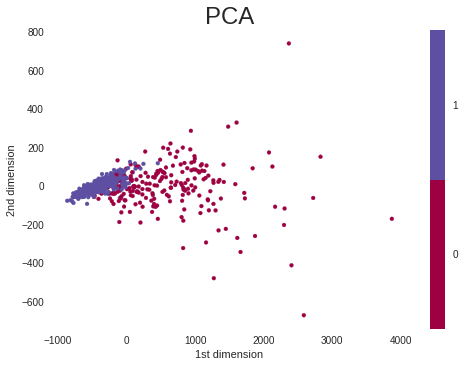

In [0]:

embedding_plot(newData, data.target,"PCA")


#### KNN on reduced dimension data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(newData, data.target, test_size=0.4, random_state=5)

new = knn.fit(X_train,y_train)

In [0]:
y_pred = new.predict(X_test)
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))

accuracy of the predictions: 0.9692982456140351


In [0]:
X_test.shape

(228, 2)

## genomic data 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Build a directory and name it *ML_Python_PMCRT* in your colab directory in google drive. Then upload the two files "CCLE_ExpMat_Top500Genes.csv" and "CCLE_ExpMat_Pheno.csv" in this directory.

In [0]:
import pandas as pd

CCLE_exp = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/CCLE_ExpMat_Top500Genes.csv', index_col=0)
CCLE_pheno = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/CCLE_ExpMat_Pheno.csv', index_col=0)
####
print("shape of the expression dataframe:", CCLE_exp.shape)
print("shape of the expression dataframe:", CCLE_pheno.shape)
####
CCLE_exp = CCLE_exp.transpose()
n_samples, n_features = CCLE_exp.shape


CCLE_exp.shape

shape of the expression dataframe: (500, 550)
shape of the expression dataframe: (550, 17)


(550, 500)

### Let's count how may samples we have for each class (tissue of origin)

In [0]:
import collections
collections.Counter(CCLE_pheno.loc[:,"tissueid"])

Counter({'breast': 54,
         'central_nervous_system': 49,
         'haematopoietic_and_lymphoid_tissue': 170,
         'large_intestine': 57,
         'lung': 172,
         'skin': 48})

In [0]:
collections.Counter(np.where(CCLE_pheno.loc[:,"tissueid"] == 'breast')[0])

We need to echange the class names to numeriz values unique for each class.

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(CCLE_pheno.loc[:,"tissueid"])
y=le.transform(CCLE_pheno.loc[:,"tissueid"])

collections.Counter(y)

LabelEncoder()

Counter({0: 54, 1: 49, 2: 170, 3: 57, 4: 172, 5: 48})

# Installation instructions




*   [scikit-learn](https://scikit-learn.org/stable/install.html)
*   [Anaconda distribution of Python](https://store.continuum.io/cshop/anaconda/)
*   [IPython](http://ipython.org/install.html)





